In [2]:
import numpy as np
import torch
import cv2
import os
import matplotlib.pyplot as plt

from models.trba import TrBA
from utils import *
from data.utils import preprocess
from data.dataset import HWDataset
from data.utils import *

In [6]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
weight = './outputs/train_baseline_stn0/best_cer_0.058239467442035675.pth'
root_dir = '/mnt/disk1/nmduong/hust/intro2dl/data/words'

converter = AttnLabelConverter()

In [7]:
model = TrBA(
    img_channel=3,
    img_height=32,
    img_width=100,
    max_len=25,
    num_class = converter.num_classes,
    stn_on=False
).to(device)

In [8]:
model.load_state_dict(torch.load(weight)['model_state_dict'])
model.eval()
    
img_height = 32
img_width = 100
batch_size = 1
max_length = 25
        
def get_pred(fn):
    image = cv2.imread(fn).astype(np.float32)
    if image.ndim==2:
        image = image[np.newaxis]
    image = image.transpose((2,0,1))
    image = torch.from_numpy(image).type(torch.FloatTensor)
    image = resize_image(image, min_size=img_height, max_size=img_width)
    image = padding(image, min_size=img_height, max_size=img_width)
    
    length_for_pred = torch.IntTensor([max_length] * batch_size).to(device)
    text_for_pred = torch.LongTensor(batch_size, max_length + 1).fill_(0).to(device)
    
    image = image.unsqueeze(0)
    model.eval()
    
    with torch.no_grad():
        preds, _ = model(image.to(device), text_for_pred, is_train=False)
    _, preds_index = preds.max(2)
    pred_str = converter.decode(preds_index, length_for_pred)[0]
    # print(pred_str)
    
    pred_EOS = pred_str.find('[s]')
    pred_str = pred_str[:pred_EOS]
    
    img2show = cv2.imread(fn).astype(np.int8)
    if img2show.ndim==2:
        img2show = img2show[np.newaxis]
        
    return pred_str, img2show.astype(np.int8)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


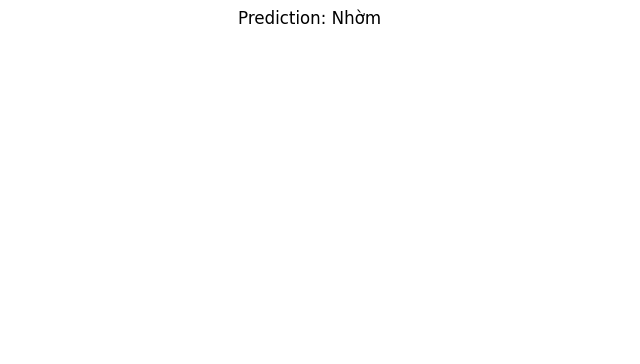

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


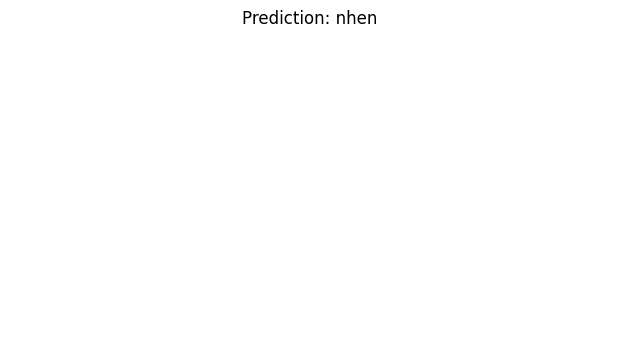

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


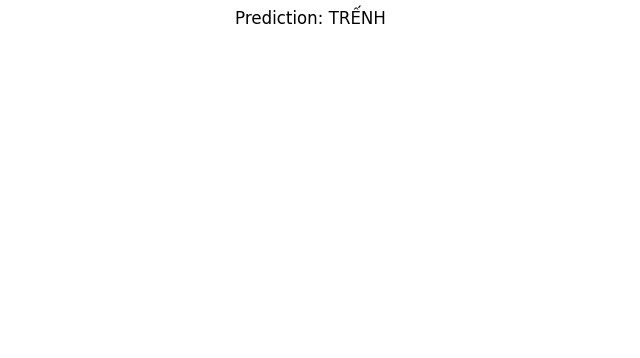

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


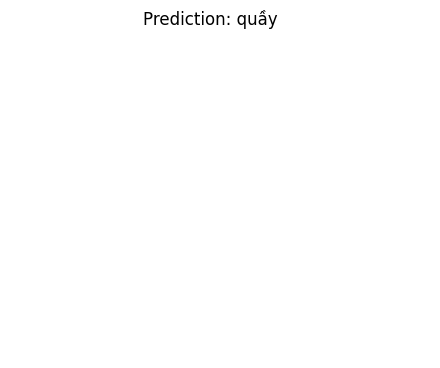

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


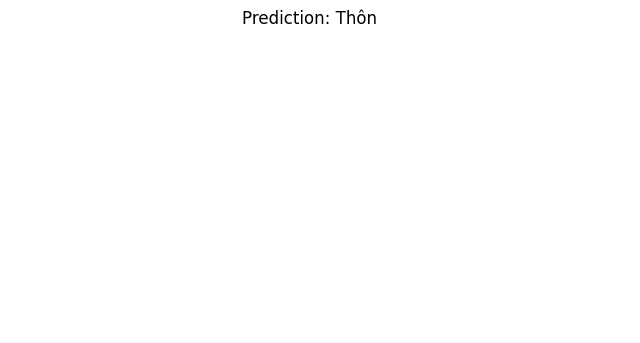

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


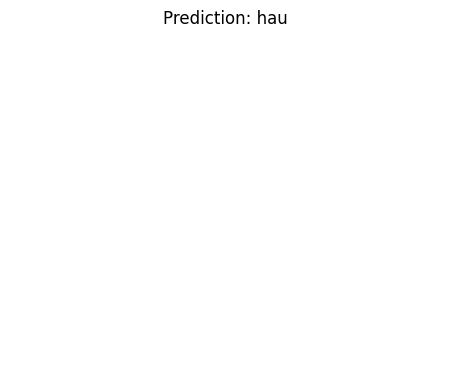

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


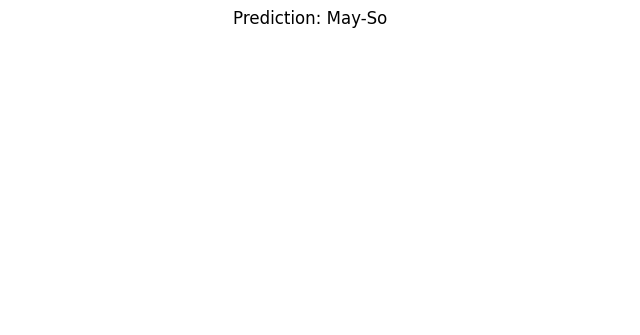

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


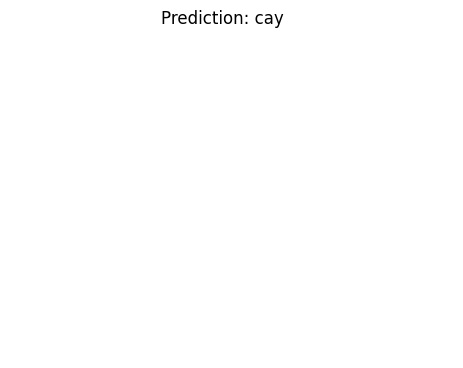

In [9]:
test_dir = "./images"
test_fn = [os.path.join(test_dir, f) for f in os.listdir(test_dir)]

for fn in test_fn:
    pred, img = get_pred(fn)
    fig = plt.figure(figsize=(6, 2))
    plt.imshow(img)
    plt.suptitle(f"Prediction: {pred}")
    plt.axis('off')
    
    plt.show()